<a href="https://colab.research.google.com/github/Spontyrupple/mamaine/blob/main/King_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:**

**"Where Do We Need to Focus? Mapping K-4 Reading Proficiency in King County"**

**Introduction**

On September 14 2023, the KUOW website carried a news story that quoted a study that revealed that 50% of Washington students were reading below their grade level. This study is therefore a spatial analysis that highlights gaps in K-4 reading proficiency in Washington's King County.

**Data Sources**

GIS data

https://gis-kingcounty.opendata.arcgis.com/datasets/bace62518e9e4b5fbd6dfc386380d417/explore


Academic Acheivement reports

https://www.kuow.org/stories/new-test-scores-show-50-of-wa-students-are-reading-at-grade-level

https://data.kingcounty.gov/County-Operations/EGP-Nonprofits/4wxy-htkj/about_data


In [2]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [3]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [4]:
#!python --version
gpd.__version__

'1.0.1'

In [5]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O kingcounty.zip https://docs.google.com/uc?id=1oZr6tGskrK9bh1Fcnr7YR4CGurSMcOAT&export=download

zip_ref = zipfile.ZipFile('kingcounty.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kingc=gpd.read_file('School_Districts_in_King_County___schdst_area.shp') #load the shapefile with gpd as njC

**King County Bounderies**

<Axes: >

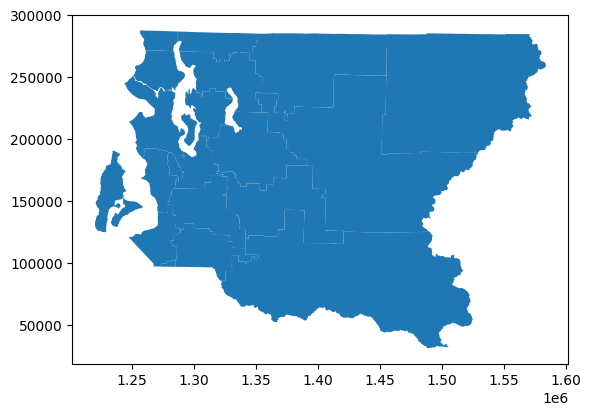

In [6]:
#make the map
kingc.plot()

In [7]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O kingcounty.zip https://docs.google.com/uc?id=1oZr6tGskrK9bh1Fcnr7YR4CGurSMcOAT&export=download

zip_ref = zipfile.ZipFile('kingcounty.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kingc=gpd.read_file('School_Districts_in_King_County___schdst_area.shp') #load the shapefile with gpd as njC

In [8]:
kingc.dtypes #with geopandas can do stuff like with pandas :)
#kingc.info()

,0
OBJECTID,int32
SCHDST,object
NAME,object
DSTNUM,object
Shape_Leng,float64
Shape_Area,float64
geometry,geometry


In [27]:
kingc.columns

Index(['OBJECTID', 'SCHDST', 'NAME', 'DSTNUM', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [28]:
kingc.NAME

,NAME
0,Seattle
1,Federal Way
2,Enumclaw
3,Mercer Island
4,Highline
5,Vashon Island
6,Renton
7,Skykomish
8,Bellevue
9,Tukwila


In [13]:
kingc=kingc[['SCHDST','NAME','DSTNUM','geometry']]

<Axes: >

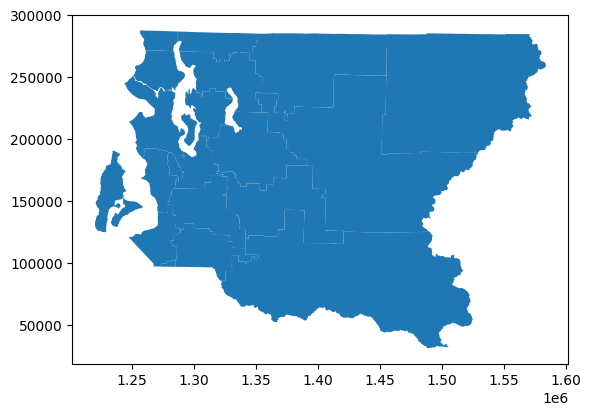

In [ ]:
kingc.plot()

In [10]:
# Convert the 'DSTNUM' column to numeric type
kingc['DSTNUM'] = pd.to_numeric(kingc['DSTNUM'])

<Axes: >

[]

[]

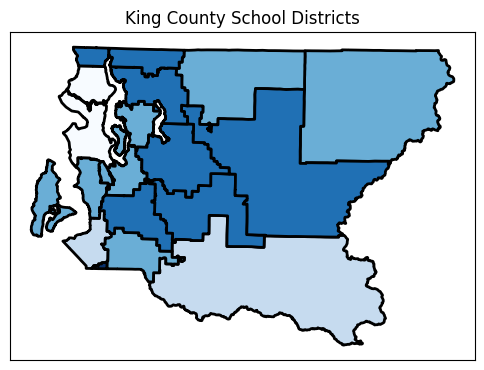

In [11]:
#first thematic map! lets unpack options esp fmt for dec pts; more later sec 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10))
kingc.plot(ax=ax,column='DSTNUM',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='Black',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
ax.legend().remove()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("King County School Districts")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [88]:
!pip install pandas
import pandas as pd

kingcclasslevel=pd.read_csv('https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/R13737901_SL970%20(1).csv')


In [89]:
kingcclasslevel.head(5)

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,SE_A12006_002,SE_A12006_003,SE_A12006_004,SE_A12006_005,SE_A12006_006,SE_A12006_007,SE_A12006_008,SE_A12006_009,SE_A12006_010,SE_A12006_011
0,5300300,"Auburn School District, Washington",wa,970,0,NaN,NaN,NaN,53,NaN,...,21203,762,11175,5088,4178,2695,435,884,367,1009
1,5300330,"Bainbridge Island School District, Washington",wa,970,0,NaN,NaN,NaN,53,NaN,...,4196,103,2078,1399,616,1358,426,409,223,300
2,5300390,"Bellevue School District, Washington",wa,970,0,NaN,NaN,NaN,53,NaN,...,25313,702,11968,6710,5933,7540,1804,2893,853,1990
3,5302400,"Edmonds School District, Washington",wa,970,0,NaN,NaN,NaN,53,NaN,...,31583,789,15103,6529,9162,5981,1420,1937,1089,1535
4,5302820,"Federal Way School District, Washington",wa,970,0,NaN,NaN,NaN,53,NaN,...,29685,1112,14627,8023,5923,4065,674,1481,429,1481


In [90]:
kingcclasslevel.dtypes



,0
Geo_FIPS,int64
Geo_QName,object
Geo_STUSAB,object
Geo_SUMLEV,int64
Geo_GEOCOMP,int64
Geo_US,float64
Geo_REGION,float64
Geo_DIVISION,float64
Geo_STATE,int64
Geo_COUNTY,float64


In [91]:
shapefile = 'School_Districts_in_King_County___schdst_area.shp'
gdf = gpd.read_file(shapefile)

In [92]:
kingcclasslevel['NAME']=kingcclasslevel ['Geo_QName'].str.replace(' School District, Washington','')

In [93]:
kingcclasslevel.head(5)

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,SE_A12006_003,SE_A12006_004,SE_A12006_005,SE_A12006_006,SE_A12006_007,SE_A12006_008,SE_A12006_009,SE_A12006_010,SE_A12006_011,NAME
0,5300300,"Auburn School District, Washington",wa,970,0,NaN,NaN,NaN,53,NaN,...,762,11175,5088,4178,2695,435,884,367,1009,Auburn
1,5300330,"Bainbridge Island School District, Washington",wa,970,0,NaN,NaN,NaN,53,NaN,...,103,2078,1399,616,1358,426,409,223,300,Bainbridge Island
2,5300390,"Bellevue School District, Washington",wa,970,0,NaN,NaN,NaN,53,NaN,...,702,11968,6710,5933,7540,1804,2893,853,1990,Bellevue
3,5302400,"Edmonds School District, Washington",wa,970,0,NaN,NaN,NaN,53,NaN,...,789,15103,6529,9162,5981,1420,1937,1089,1535,Edmonds
4,5302820,"Federal Way School District, Washington",wa,970,0,NaN,NaN,NaN,53,NaN,...,1112,14627,8023,5923,4065,674,1481,429,1481,Federal Way


In [94]:
# Convert the 'NAME' column in 'kingc' to object type
kingc['NAME'] = kingc['NAME'].astype(str)

# Now perform the merge
kingc1 = pd.merge(kingc, kingcclasslevel, on='NAME',how='outer',indicator=True)
kingc1[['NAME','SE_A12006_002','SE_A12006_003','SE_A12006_004','SE_A12006_005','_merge']]

,NAME,SE_A12006_002,SE_A12006_003,SE_A12006_004,SE_A12006_005,_merge
0,Auburn,21203.0,762.0,11175.0,5088.0,both
1,Bainbridge Island,4196.0,103.0,2078.0,1399.0,right_only
2,Bellevue,25313.0,702.0,11968.0,6710.0,both
3,Edmonds,31583.0,789.0,15103.0,6529.0,right_only
4,Enumclaw,NaN,NaN,NaN,NaN,left_only
5,Federal Way,29685.0,1112.0,14627.0,8023.0,both
6,Fife,NaN,NaN,NaN,NaN,left_only
7,Highline,25762.0,664.0,13446.0,5944.0,both
8,Issaquah,25227.0,482.0,13334.0,7409.0,both
9,Kent,38007.0,1555.0,20115.0,8261.0,both


<Axes: >

[]

[]

Text(0.5, 190.1295349047001, 'source/definition: https://www.socialexplorer.com/tables/ACS2022_5yr')

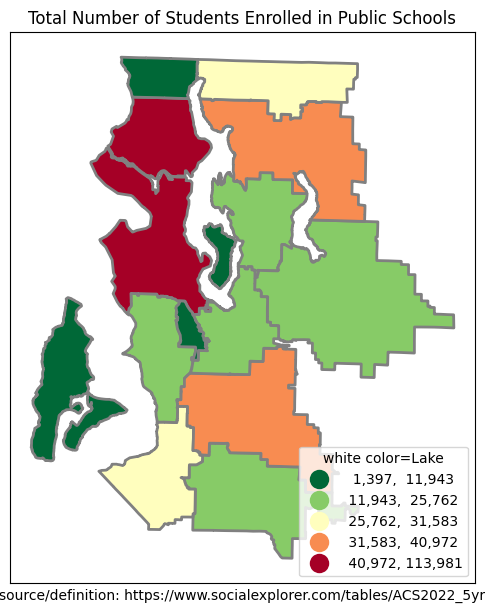

In [113]:
fig, ax = plt.subplots(1, figsize=(6,10))
kingc1.plot(ax=ax,column='SE_A12006_002',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=Lake''')
ax.title.set_text("Total Number of Students Enrolled in Public Schools")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: https://www.socialexplorer.com/tables/ACS2022_5yr''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

<Axes: >

[]

[]

Text(0.5, 190.1295349047001, 'source/definition: https://www.socialexplorer.com/tables/ACS2022_5yr')

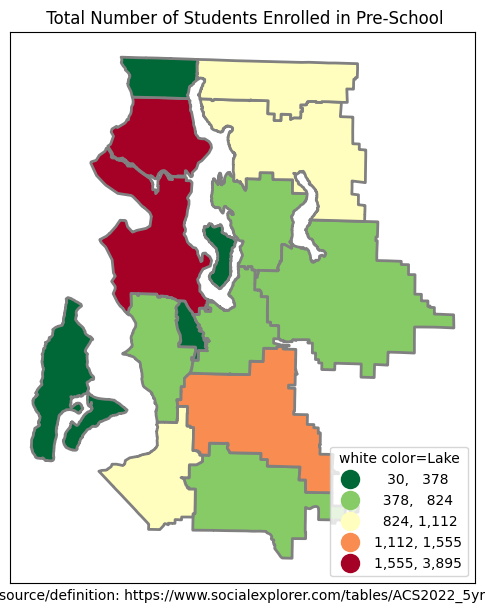

In [116]:
fig, ax = plt.subplots(1, figsize=(6,10))
kingc1.plot(ax=ax,column='SE_A12006_003',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=Lake''')
ax.title.set_text(" Total Number of Students Enrolled in Pre-School")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: https://www.socialexplorer.com/tables/ACS2022_5yr''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

<Axes: >

[]

[]

Text(0.5, 190.1295349047001, 'source/definition: https://www.socialexplorer.com/tables/ACS2022_5yr')

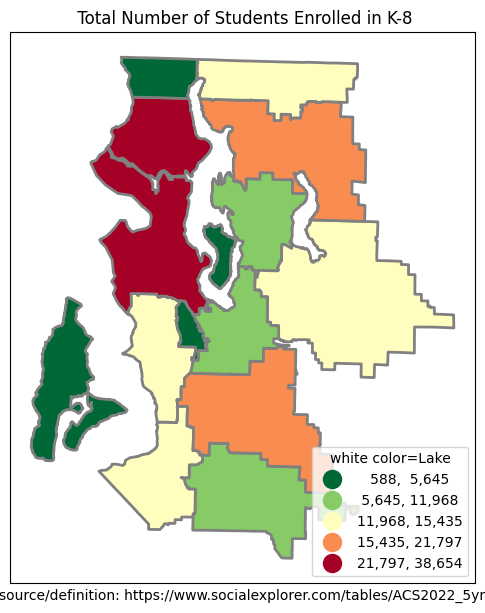

In [117]:
fig3, ax = plt.subplots(1, figsize=(6,10))
kingc1.plot(ax=ax,column='SE_A12006_004',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=Lake''')
ax.title.set_text("Total Number of Students Enrolled in K-8")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: https://www.socialexplorer.com/tables/ACS2022_5yr''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

<Axes: >

[]

[]

Text(0.5, 190.1295349047001, 'source/definition: https://www.socialexplorer.com/tables/ACS2022_5yr')

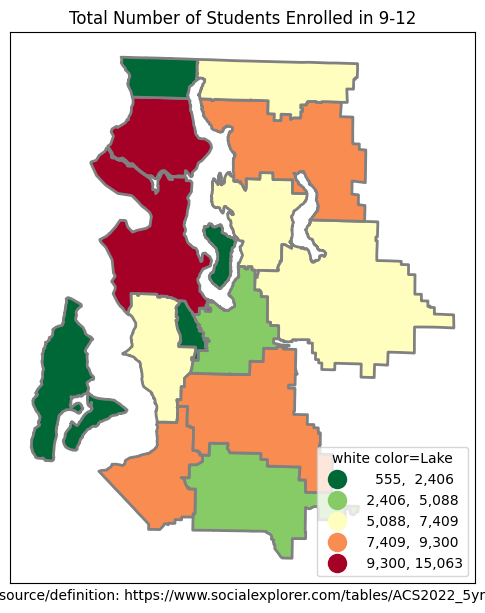

In [132]:
fig4, ax = plt.subplots(1, figsize=(6,10))
kingc1.plot(ax=ax,column='SE_A12006_005',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=Lake''')
ax.title.set_text("Total Number of Students Enrolled in 9-12")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: https://www.socialexplorer.com/tables/ACS2022_5yr''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

<Axes: >

Text(0.5, 1.0, 'Total Number of Students Enrolled in Public Schools')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Total Number of Students Enrolled in Pre-School')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Total Number of Students Enrolled in K-8')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Total Number of Students Enrolled in 9-12')

[]

[]

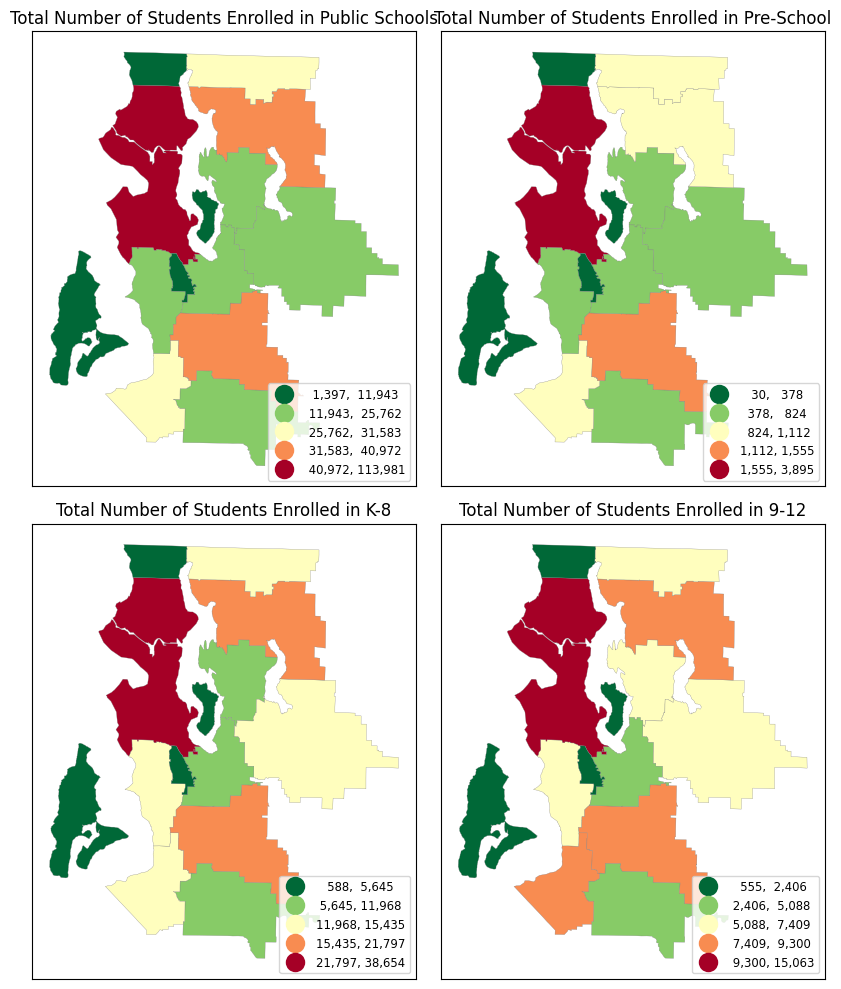

In [133]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True, tight_layout=True)

# Top-left subplot
kingc1.plot(ax=axs[0, 0], column='SE_A12006_002', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.2,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[0, 0].set_title("Total Number of Students Enrolled in Public Schools")
axs[0, 0].set_xticks([]); axs[0, 0].set_yticks([])

# Top-right subplot
kingc1.plot(ax=axs[0, 1], column='SE_A12006_003', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.2,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[0, 1].set_title("Total Number of Students Enrolled in Pre-School")
axs[0, 1].set_xticks([]); axs[0, 1].set_yticks([])

# Bottom-left subplot
kingc1.plot(ax=axs[1, 0], column='SE_A12006_004', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.2,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[1, 0].set_title("Total Number of Students Enrolled in K-8")
axs[1, 0].set_xticks([]); axs[1, 0].set_yticks([])

# Bottom-right subplot
kingc1.plot(ax=axs[1, 1], column='SE_A12006_005', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.2,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[1, 1].set_title("Total Number of Students Enrolled in 9-12")
axs[1, 1].set_xticks([]); axs[1, 1].set_yticks([])

plt.show()



In [100]:
a=pd.read_csv('https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/EGP_Nonprofits_20240924.csv')
a.head(5)

,Organization Name,Location,Tax Identification Number,KCEGP Code,Website,Short Description,Category,Category 3,Category 2,Link 1,...,Status,Community of Opportunity,Current Pledges,Link 1 description,Link 2 description,Link 3 description,Link 4 description,Communities Served 1,Communities Served 2,Communities Served 3
0,Toys for Tots,"18251 Quantico Gateway Dr\nTriangle, VA 22172\...",20-3021444,2873,https://www.toysfortots.org,Help us fulfill the Christmas Holiday dreams o...,Poverty Relief,NaN,NaN,NaN,...,Returning,NaN,NaN,NaN,https://www.guidestar.org/profile/20-3021444,NaN,NaN,NaN,NaN,NaN
1,Rise Against Hunger,"4801 Glenwood Ave Ste 200\nRaleigh, NC 27612\n...",16-1541024,3587,https://www.riseagainsthunger.org,Growing a global movement to end hunger by emp...,Food & Hunger,Community Development,International Relief & Development,https://www.charitynavigator.org/ein/161541024,...,Returning,NaN,NaN,https://www.charitynavigator.org/ein/161541024,https://www.guidestar.org/profile/16-1541024,NaN,NaN,"Immigrants, Migrants, Refugees",Economically Disadvantaged People,Children & Youth
2,Arthritis Foundation,"1355 Peachtree St 6th Fl\nAtlanta, GA 30309\n(...",58-1341679,4091,https://www.arthritis.org,Champions in life-changing solutions and medic...,Health (General),NaN,"Disease, Disorders, & Medical Research",NaN,...,Returning,NaN,NaN,NaN,https://www.guidestar.org/profile/58-1341679,NaN,NaN,Seniors,Children & Youth,Economically Disadvantaged People
3,"American Family Association, Inc.","PO Drawer 2440\nTupelo, MS 38803\n(34.25075, -...",64-0607275,4162,https://www.afa.net,"Educates Christians through radio, video, inte...",Community Development,Youth Development,Spiritual Development,NaN,...,Returning,NaN,NaN,NaN,https://www.guidestar.org/profile/64-0607275,NaN,NaN,Children & Youth,NaN,NaN
4,PorchLight (formerly Congregations for the Hom...,"13668 SE Eastgate Way\nBellevue, WA 98005\n(47...",45-3932748,5703,https://porchlightcares.org/,Our mission is to end homelessness on the East...,Housing & Employment,NaN,NaN,NaN,...,Returning,NaN,NaN,NaN,https://www.guidestar.org/profile/45-3932748,NaN,NaN,NaN,NaN,NaN


In [47]:
a.Location .str.extract('.*\((.*)\).*')

,0
0,"38.552867416, -77.333597791"
1,"35.842995982, -78.682300997"
2,"33.791822988, -84.384998979"
3,"34.25075, -88.74628"
4,"47.580971991, -122.158169021"
...,...
1290,"38.822128009, -77.043229973"
1291,"48.434607013, -122.328614016"
1292,"47.700923983, -122.326514014"
1293,"47.368438988, -122.231255026"
